In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [2]:
df = pd.read_csv('D:/Sem V/Time series/testset.csv')

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [5]:
df.shape

(100990, 20)

In [6]:
df['datetime_utc']=pd.to_datetime(df['datetime_utc'])

In [7]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [8]:
df.iloc[:,11].isna().sum()

673

In [9]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [10]:
df.shape

(100990, 20)

In [11]:
x = df.iloc[:,11]

In [12]:
x.head()

0    30.0
1    28.0
2    24.0
3    24.0
4    23.0
Name:  _tempm, dtype: float64

In [13]:
type(x)

pandas.core.series.Series

In [14]:
type(list(x))

list

In [15]:
y = df.iloc[:,0]

In [16]:
y.head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [17]:
data=df[['datetime_utc',' _tempm']]

In [18]:
data.head()

,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [19]:
data=pd.DataFrame(list(data[' _tempm']),index=data.datetime_utc,columns=['temperature'])

In [20]:
data.head()

,temperature
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [21]:
data.shape

(100990, 1)

In [22]:
data.isna().sum()

temperature    673
dtype: int64

In [23]:
data = data.dropna()

In [24]:
data.shape

(100317, 1)

In [25]:
import matplotlib.pyplot as plt

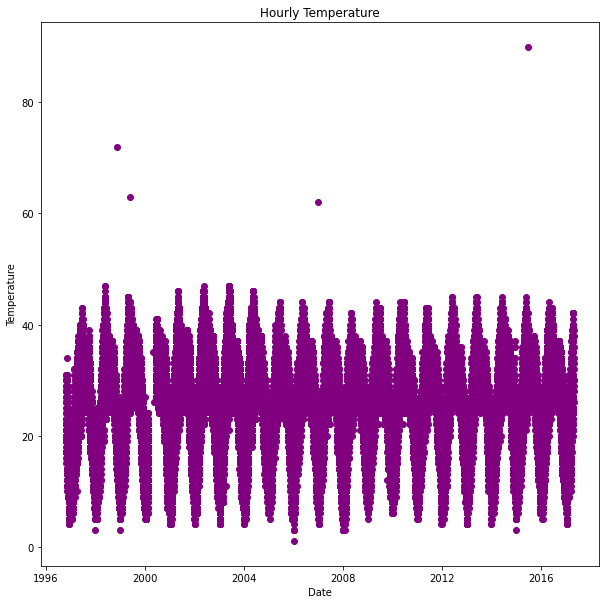

In [26]:


fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data.index.values,
           data['temperature'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temperature",
       title="Hourly Temperature")

plt.show()

In [27]:
data_daily = data.resample('D').mean()

In [28]:
data_daily.sample(6)

,temperature
datetime_utc,
2003-09-15,27.760870
2004-07-09,32.285714
2010-08-22,27.125000
1996-12-02,15.285714
1998-06-10,26.812500
2014-12-27,10.375000


In [29]:
data_monthly=data_daily.resample('M').mean()

In [30]:
data_monthly

,temperature
datetime_utc,
1996-11-30,19.548146
1996-12-31,13.795090
1997-01-31,12.863702
1997-02-28,15.936124
1997-03-31,21.292248
...,...
2016-12-31,17.672565
2017-01-31,15.710873
2017-02-28,18.349981


In [31]:
data_monthly.shape

(246, 1)

In [32]:
data_monthly.isna().sum()

temperature    1
dtype: int64

In [33]:
data_monthly[data_monthly['temperature'].isna()]

,temperature
datetime_utc,
2000-03-31,NaN


In [34]:
data_monthly['temperature'].fillna(value=22.5,inplace=True)

In [35]:
data_monthly[data_monthly['temperature'].isna()]

,temperature
datetime_utc,


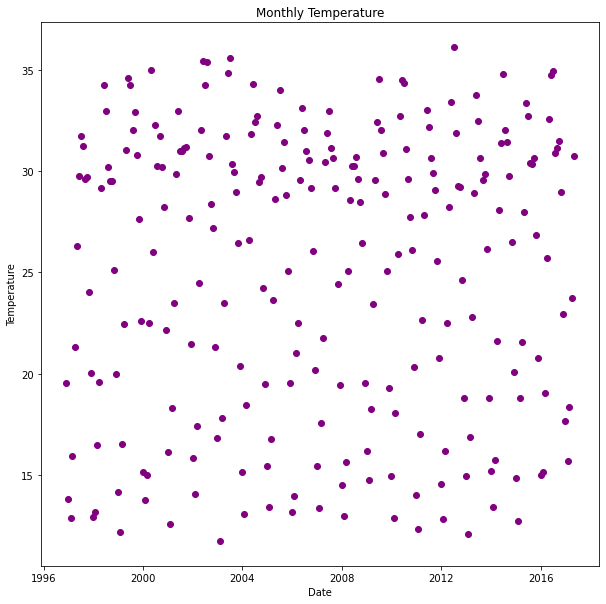

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_monthly.index.values,
           data_monthly['temperature'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temperature",
       title="Monthly Temperature")

plt.show()

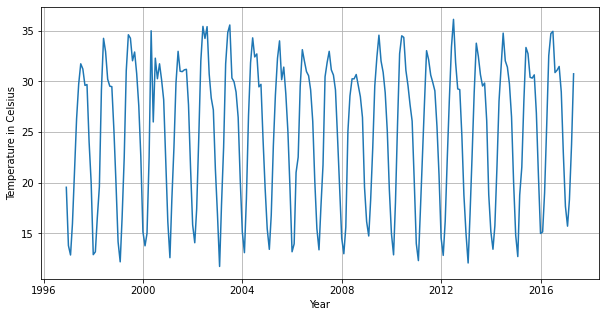

In [184]:
plt.figure(figsize=(10,5))
plt.plot(data_monthly.index, data_monthly['temperature'])
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.grid(True)
plt.show()

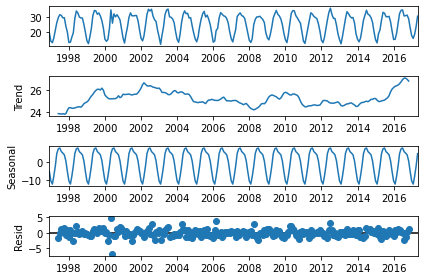

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose



analysis = data_monthly[['temperature']].copy()


decompose_result_mult = seasonal_decompose(analysis)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [41]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [57]:
check_stationarity(data_monthly)

ADF Statistic: -2.195621
p-value: 0.207838
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
Non-stationary


In [202]:
#differencing the original data_monthly time series
diff = data_monthly.diff()
diff=diff.dropna()

In [203]:
check_stationarity(diff)

ADF Statistic: -16.130611
p-value: 0.000000
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
Stationary


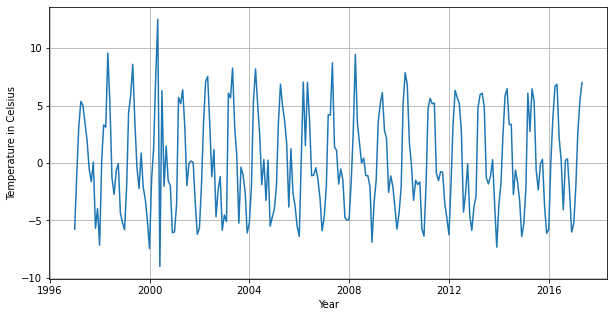

In [204]:
plt.figure(figsize=(10,5))
plt.plot(diff.index, diff['temperature'])
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


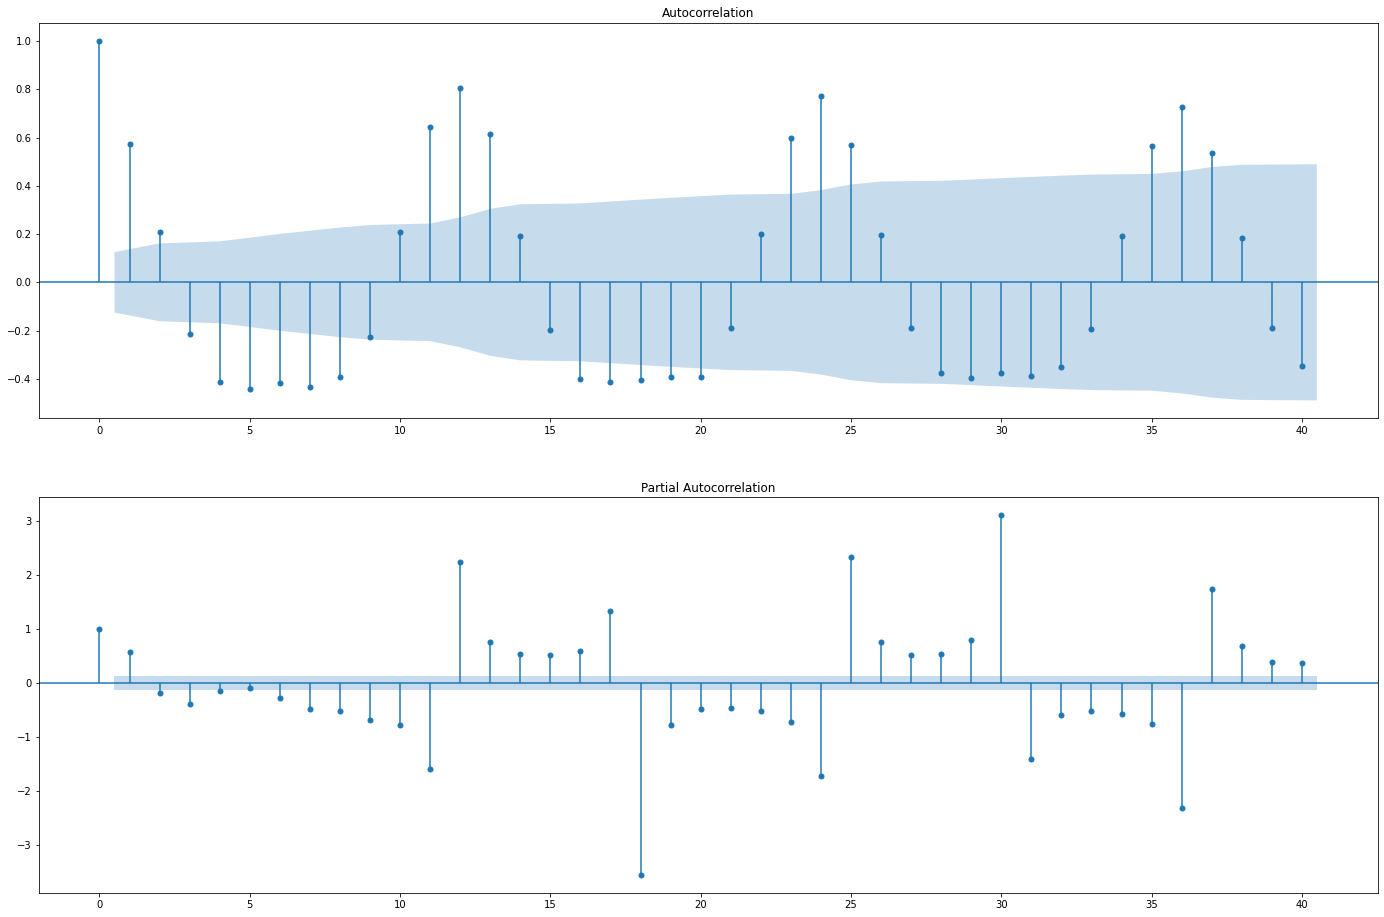

In [205]:
fig = plt.figure(figsize=(24,16))
ax1 = fig.add_subplot(211)
fig = plot_acf(diff.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(diff, lags=40, ax=ax2)

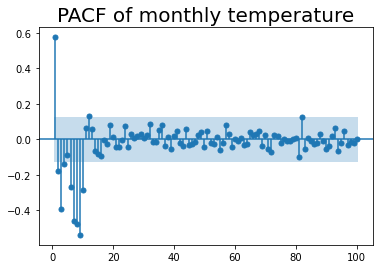

In [187]:
plot_pacf(diff, lags = 40, alpha = 0.05 ,method='ywm', zero=False)
plt.title("PACF of monthly temperature", size = 20)
plt.show()

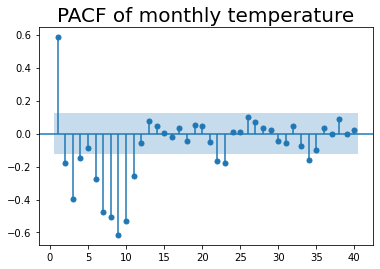

In [72]:
plot_pacf(diff[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of monthly temperature", size = 20)
plt.show()

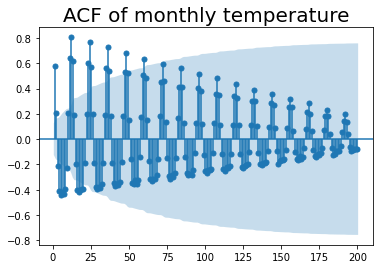

In [186]:
plot_acf(diff, lags = 200, alpha = 0.05,zero=False)
plt.title("ACF of monthly temperature", size = 20)
plt.show()

In [43]:
import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
#                 print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    


In [44]:
sarimax_gridsearch(data_monthly, pdq, pdqs, freq='M')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximu

,pdq,pdqs,bic
143,"(0, 1, 2)","(0, 2, 2, 12)",759.789695
467,"(1, 2, 2)","(0, 2, 2, 12)",762.299195
224,"(0, 2, 2)","(0, 2, 2, 12)",763.475984
359,"(1, 1, 1)","(0, 2, 2, 12)",763.914267
386,"(1, 1, 2)","(0, 2, 2, 12)",763.916471


In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(data_monthly, order = (0, 1, 2), seasonal_order=(0,2,2,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.bic


759.7896947077991

In [220]:
#best aic

from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(data_monthly, order = (1, 1, 2), seasonal_order=(0,2,2,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.aic
# SARIMAXmodel.bic



744.3093220598994

In [ ]:
#making an index for prediction dates

In [47]:
data_monthly.index

DatetimeIndex(['1996-11-30', '1996-12-31', '1997-01-31', '1997-02-28',
               '1997-03-31', '1997-04-30', '1997-05-31', '1997-06-30',
               '1997-07-31', '1997-08-31',
               ...
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', name='datetime_utc', length=246, freq='M')

In [48]:
prediction_index = pd.date_range(start='5/1/2017', periods=24, freq='M',name='datetime_utc')

In [49]:
prediction_index

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30'],
              dtype='datetime64[ns]', name='datetime_utc', freq='M')

In [219]:
#plotting forecast

In [221]:
y_pred = SARIMAXmodel.get_forecast(len(prediction_index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = prediction_index
y_pred_out = y_pred_df["Predictions"] 

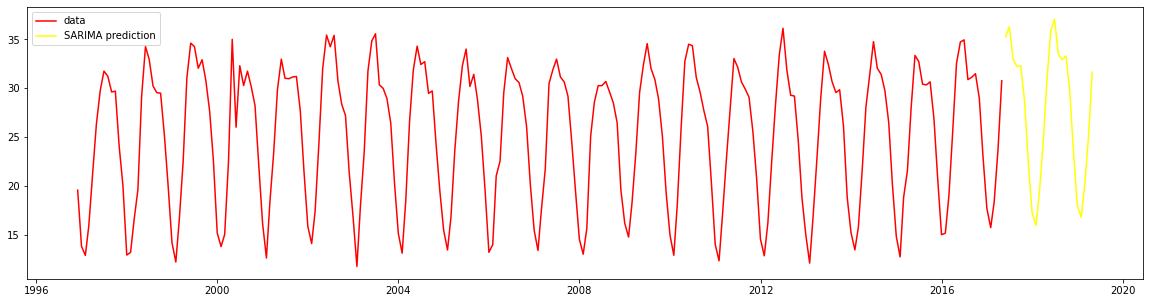

In [222]:
plt.figure(figsize=(20,5)) 

plt.plot(data_monthly, color='red', label='data')
plt.plot(y_pred_out, color='yellow', label='SARIMA prediction')

plt.legend()
plt.show()

In [177]:
#some iterations
#3,2,2
SARIMAXmodel = SARIMAX(data_monthly, order = (0, 1, 2), seasonal_order=(3,2,2,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
results = SARIMAXmodel.fit()
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.aic

696.0729754443779

In [182]:
#3,2,2
SARIMAXmodel = SARIMAX(data_monthly, order = (1, 1, 1), seasonal_order=(2,2,2,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
results = SARIMAXmodel.fit()
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.aic

788.3768714433579

In [176]:
#2,2,2
SARIMAXmodel = SARIMAX(data_monthly, order = (0, 1, 2), seasonal_order=(2,2,2,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
results = SARIMAXmodel.fit()
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.aic

771.9262335409522

In [46]:
SARIMAXmodel = SARIMAX(data_monthly, order = (0, 1, 2), seasonal_order=(0,2,2,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
results = SARIMAXmodel.fit()
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.aic

743.4504039124824

In [216]:
#using inference from acf and pacf plots, after trial and error we get (1,1,1) and (3,2,4,12) as best model

In [218]:
#best iteration
#3,2,4
SARIMAXmodel = SARIMAX(data_monthly, order = (1, 1, 1), seasonal_order=(3,2,4,12),enforce_stationarity=False,enforce_invertibility=False,freq='M')
results = SARIMAXmodel.fit()
SARIMAXmodel = SARIMAXmodel.fit()
SARIMAXmodel.aic

619.8271306071249

In [223]:
y_pred = SARIMAXmodel.get_forecast(len(prediction_index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = prediction_index
y_pred_out = y_pred_df["Predictions"] 

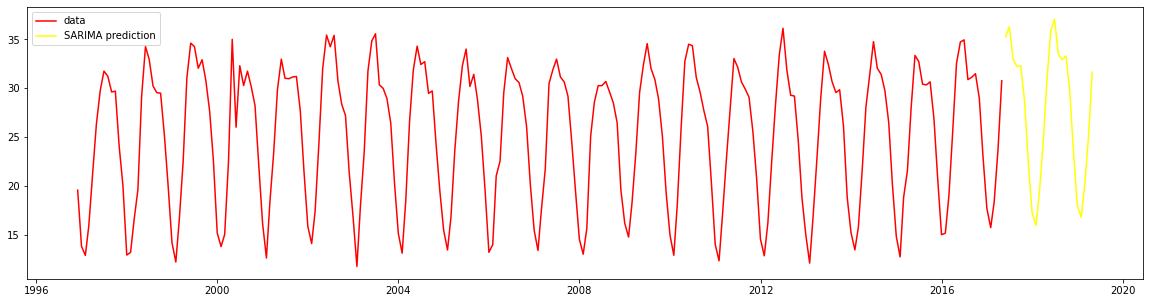

In [224]:
plt.figure(figsize=(20,5)) 

plt.plot(data_monthly, color='red', label='data')
plt.plot(y_pred_out, color='yellow', label='SARIMA prediction')

plt.legend()
plt.show()

In [226]:
#diagnostic graphs

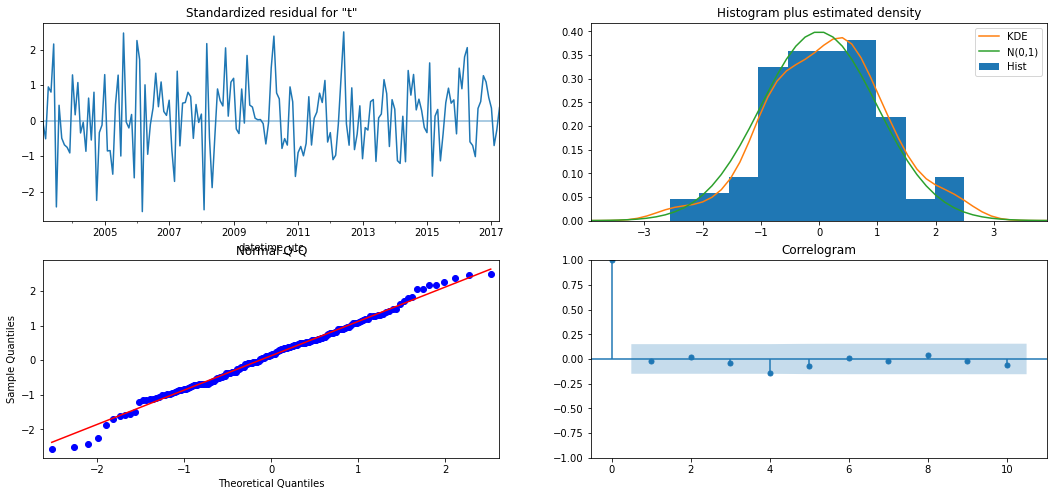

In [227]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()